In [33]:
tokenizer = LlamaTokenizer.from_pretrained(
    "decapoda-research/llama-7b-hf"
)
tokenizer.eos_token

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


''

In [15]:
from datasets import load_dataset
from transformers import LlamaTokenizer


tokenizer = LlamaTokenizer.from_pretrained(
    "decapoda-research/llama-7b-hf"
)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

data = load_dataset("json", data_files="llama-dataset-2023-05-03.json")


def generate_prompt(data_point):
    # sorry about the formatting disaster gotta move fast
    return f"""Texte:
{data_point["input"]}
{data_point["instruction"]}

###

{data_point["output"]}"""

data = data.map(
    lambda data_point: {"prompt": tokenizer(generate_prompt(data_point))},
    num_proc=12
)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.
Found cached dataset json (/root/.cache/huggingface/datasets/json/default-2f49a9615ac29ca5/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)


  0%|          | 0/1 [00:00<?, ?it/s]

Map (num_proc=12):   0%|          | 0/47791 [00:00<?, ? examples/s]

In [30]:
tokenizer.decode(tokenizer.eos_token)

AttributeError: 'LlamaTokenizer' object has no attribute 'eos_tokn'

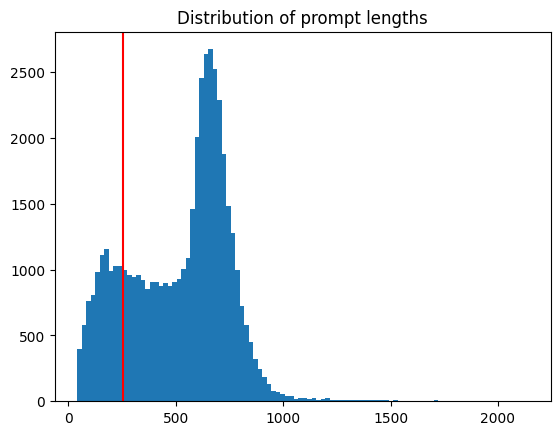

In [16]:
import matplotlib.pyplot as plt

lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
plt.hist(lens, bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(256, color="red")

In [22]:
data["train"][0]["prompt"].keys()

dict_keys(['attention_mask', 'input_ids'])

In [18]:
print(tokenizer.decode(data["train"][0]["prompt"]["input_ids"]))

<unk> Text:
🡪Comprendre la Vème République Jean François Sirinelli 
🡪Histoire de la Vème République Jean Jacques Chevalier Dalloz
🡪Code constitutionnel 
« La constitution de 1958 qui a fait ; fait et fera couler beaucoup d’encre ».
Elle s’inscrit dans une perceptive de rupture politique par rapport aux régimes précédents (tout ce qu’on a fait depuis la Révolution). Elle est qualifiable de multiples facettes. On parle de la plasticité de la constitution de 1958 (la facilité à s’adapter à des concepts politiques extrêmement variés). Elle est remarquable par sa durée. Cette constitution n’était pas faite pour durer. Il s’agissait de la solution à un problème qui était le conflit Algériens. C’est l’influence de De Gaulle qui fait naitre ce régime. Cette constitution a donné une stabilité institutionnelle au modèle démocratique français. Sous la Vème république c’est un régime parlementaire à tendance présidentiel ou de type présidentialiste qui est mis en place. Cette constitution est capa

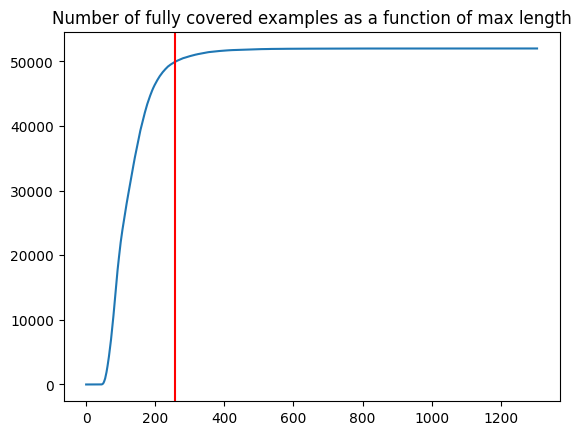

In [3]:
plt.plot([len([l for l in lens if l <= m]) for m in range(max(lens) + 1)])
plt.title("Number of fully covered examples as a function of max length")
plt.axvline(x=256, color="red")

Percentage of tokens left out:

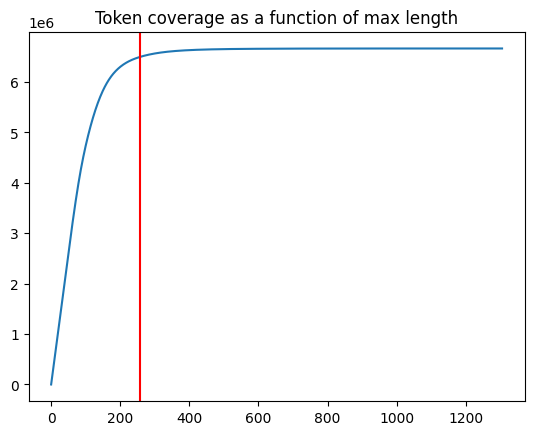

In [4]:
plt.plot([sum(min(l, m) for l in lens) for m in range(max(lens) + 1)])
plt.title("Token coverage as a function of max length")
plt.axvline(x=256, color="red")